In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('firewall_logs.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [3]:
data[:10]

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,allow,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,allow,320,140,180,6,7,3,3
7,50049,443,21285,443,allow,7912,3269,4643,23,96,12,11
8,52244,58774,2211,58774,allow,70,70,0,1,5,1,0
9,50627,443,16215,443,allow,8256,1674,6582,31,75,15,16


In [4]:
len(data)

65532

In [5]:
data.isnull().sum() # checks for data with null values and gives count

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [6]:
print("Count of each action")
print(data.Action.value_counts())

Count of each action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


<module 'matplotlib.pyplot' from '/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

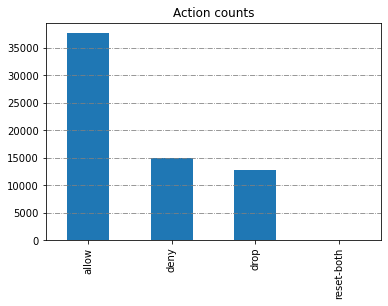

In [7]:
data.Action.value_counts().plot(kind='bar')
plt.title('Action counts')
plt.grid(axis='y',linestyle='dashdot', color='gray')
display(plt)

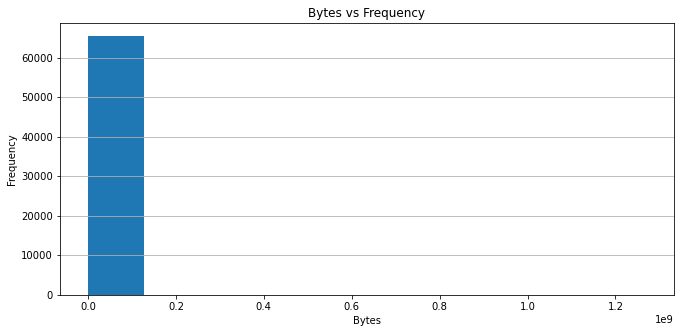

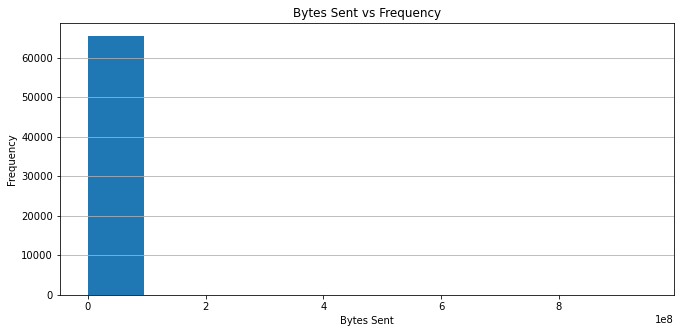

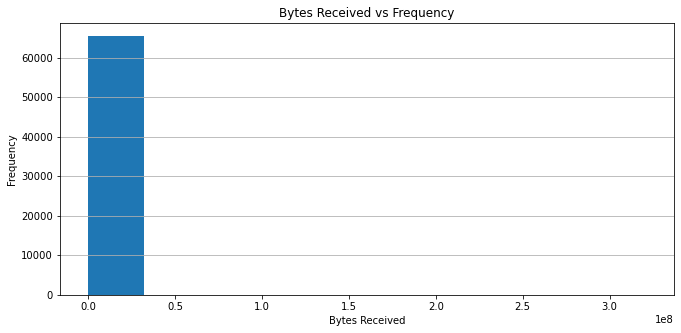

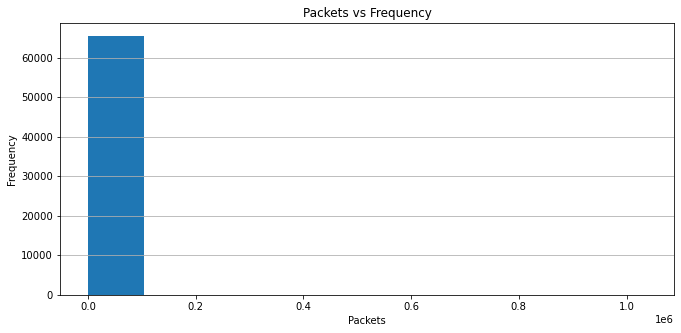

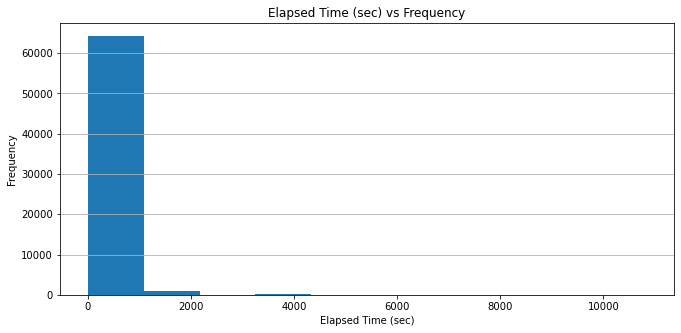

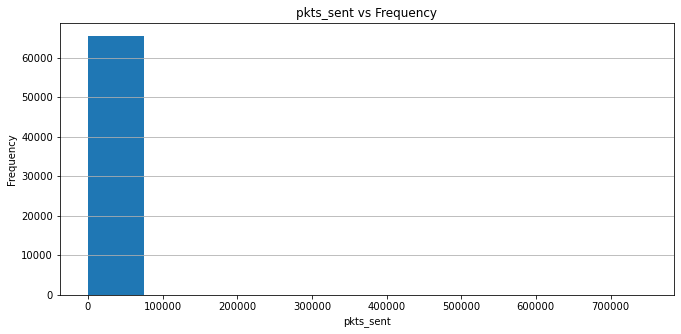

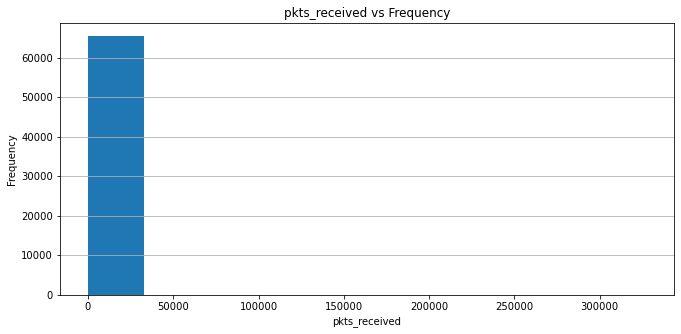

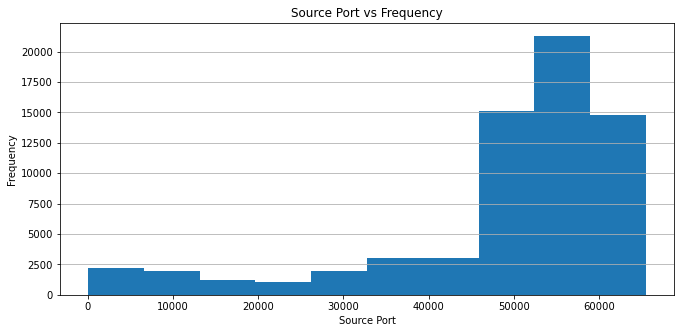

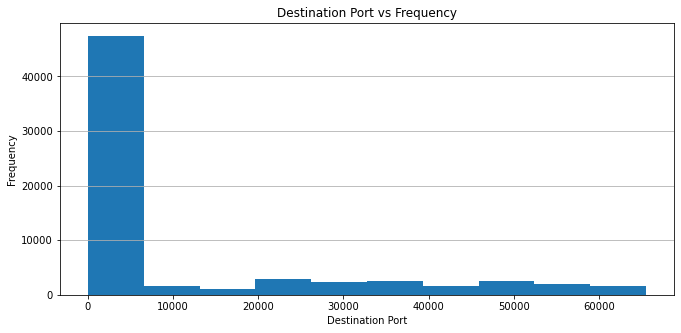

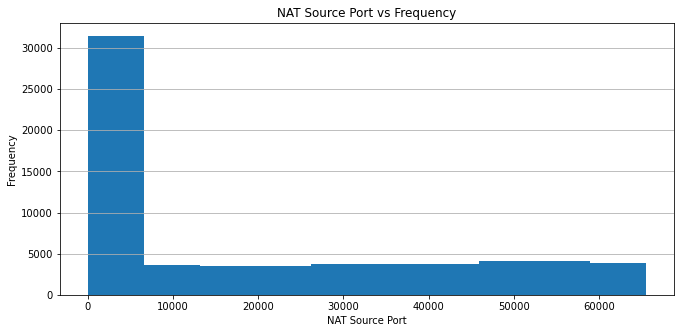

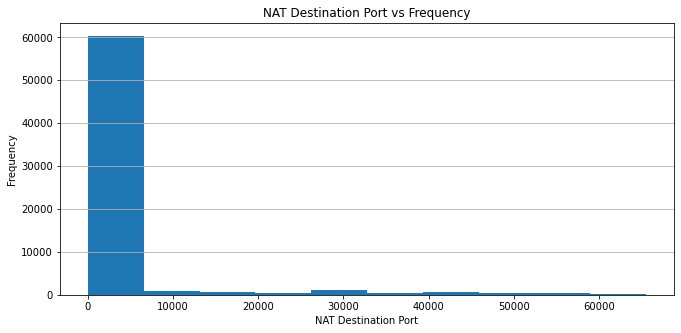

In [8]:
# Exploring Features.
features = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received','Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

for feature in features:
    fig, (ax1) = plt.subplots(1, 1, figsize=(11,5), sharex=True)
    data[feature].plot.hist()
    ax1.grid(axis='y')
    plt.title(f"{feature} vs Frequency")
    plt.xlabel(f'{feature}')
    

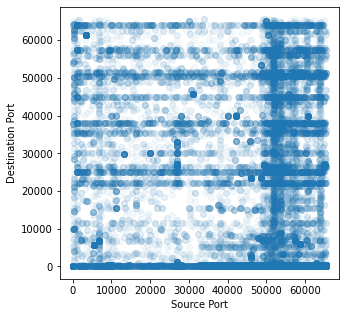

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(data['Source Port'], data['Destination Port'], alpha=0.05)
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.show()

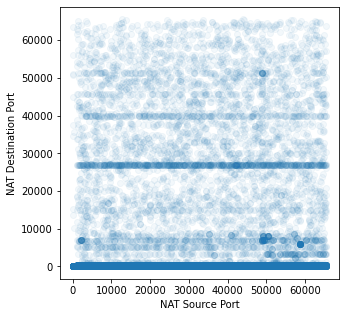

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(data['NAT Source Port'], data['NAT Destination Port'], alpha=0.05)
plt.xlabel('NAT Source Port')
plt.ylabel('NAT Destination Port')
plt.show()

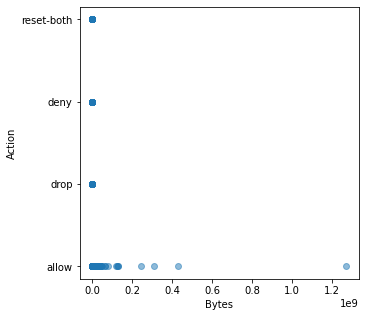

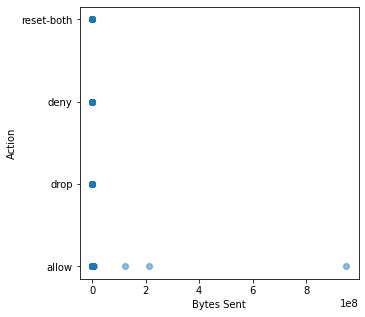

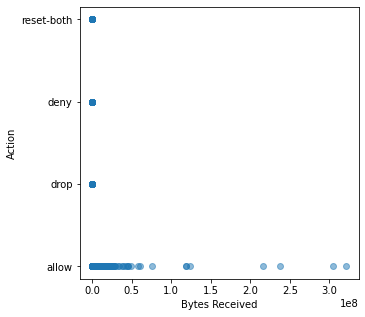

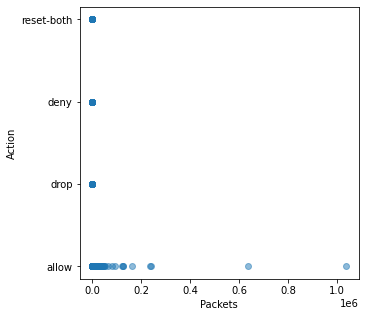

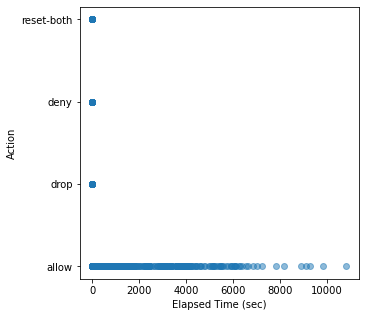

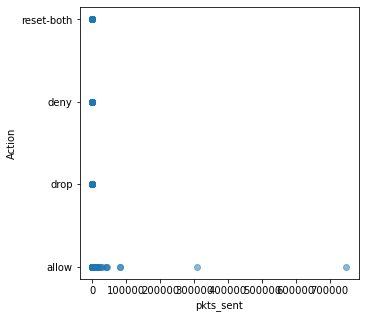

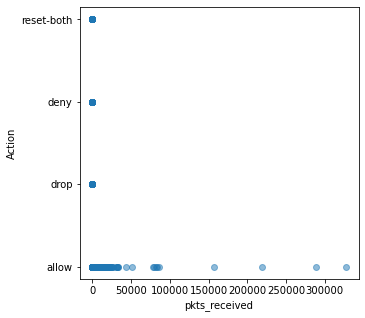

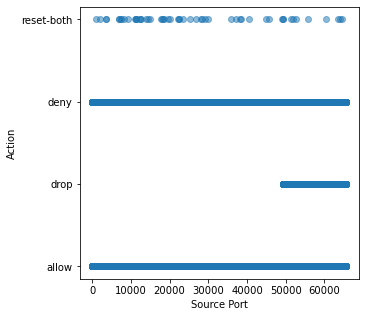

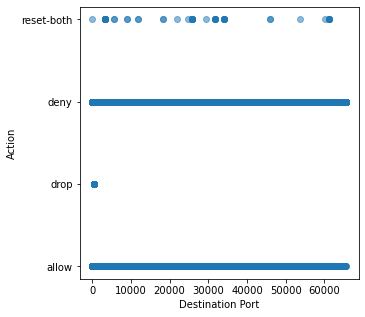

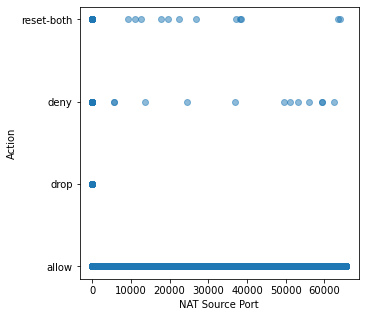

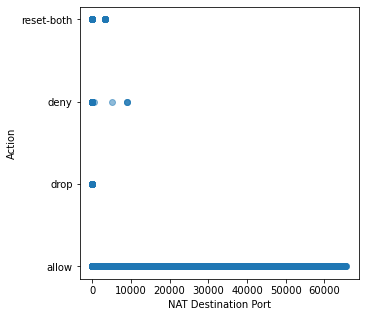

In [13]:
numeric_featuress = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received']
for feature in features:
    fig, (ax1) = plt.subplots(1, 1, figsize=(5,5), sharex=True)
    plt.scatter(data[feature], data['Action'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Action')
    plt.show()

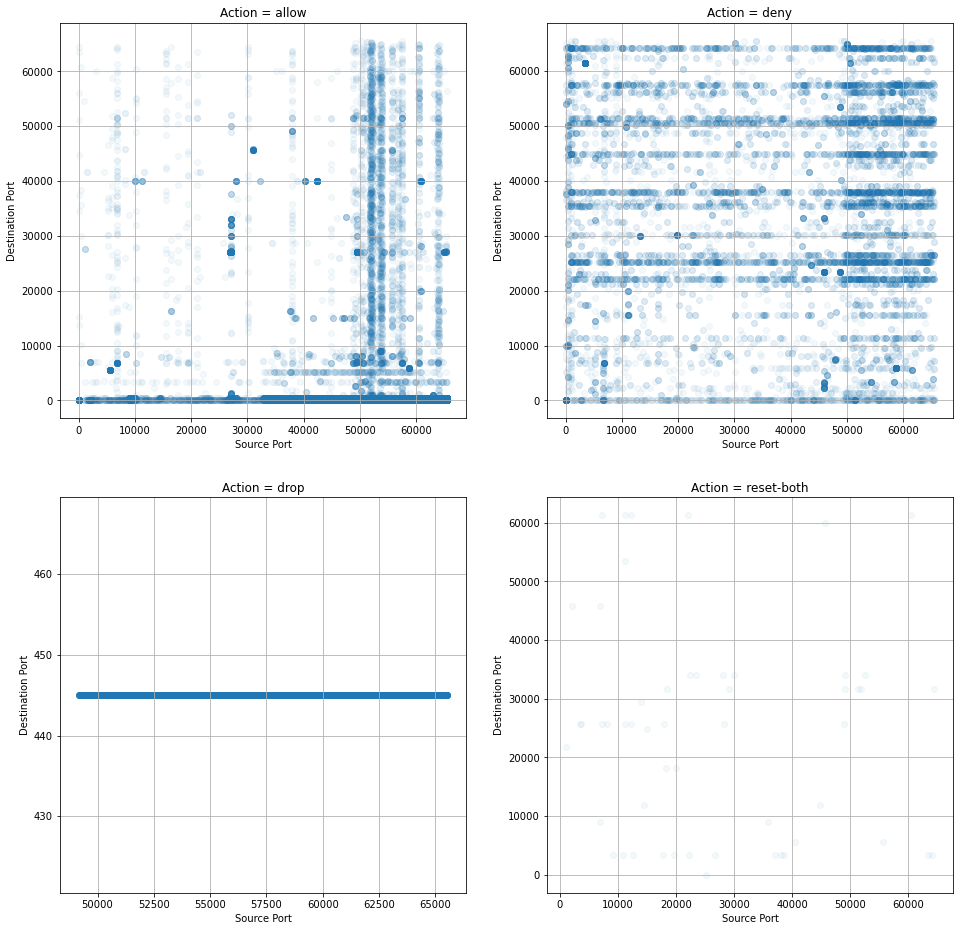

In [15]:
fig, axs = plt.subplots(2, 2,  figsize=(16,16))

allow_data = data[data['Action']=='allow']
axs[0,0].scatter(allow_data['Source Port'], allow_data['Destination Port'], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel('Source Port')
axs[0,0].set_ylabel('Destination Port')
axs[0,0].grid()

deny_data = data[data['Action']=='deny']
axs[0,1].scatter(deny_data['Source Port'], deny_data['Destination Port'], alpha=0.05)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel('Source Port')
axs[0,1].set_ylabel('Destination Port')
axs[0,1].grid()


drop_data = data[data['Action']=='drop']
axs[1,0].scatter(drop_data['Source Port'], drop_data['Destination Port'], alpha=0.05)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel('Source Port')
axs[1,0].set_ylabel('Destination Port')
axs[1,0].grid()

reset_data = data[data['Action']=='reset-both']
axs[1,1].scatter(reset_data['Source Port'], reset_data['Destination Port'], alpha=0.05)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel('Source Port')
axs[1,1].set_ylabel('Destination Port')
axs[1,1].grid()



plt.show()

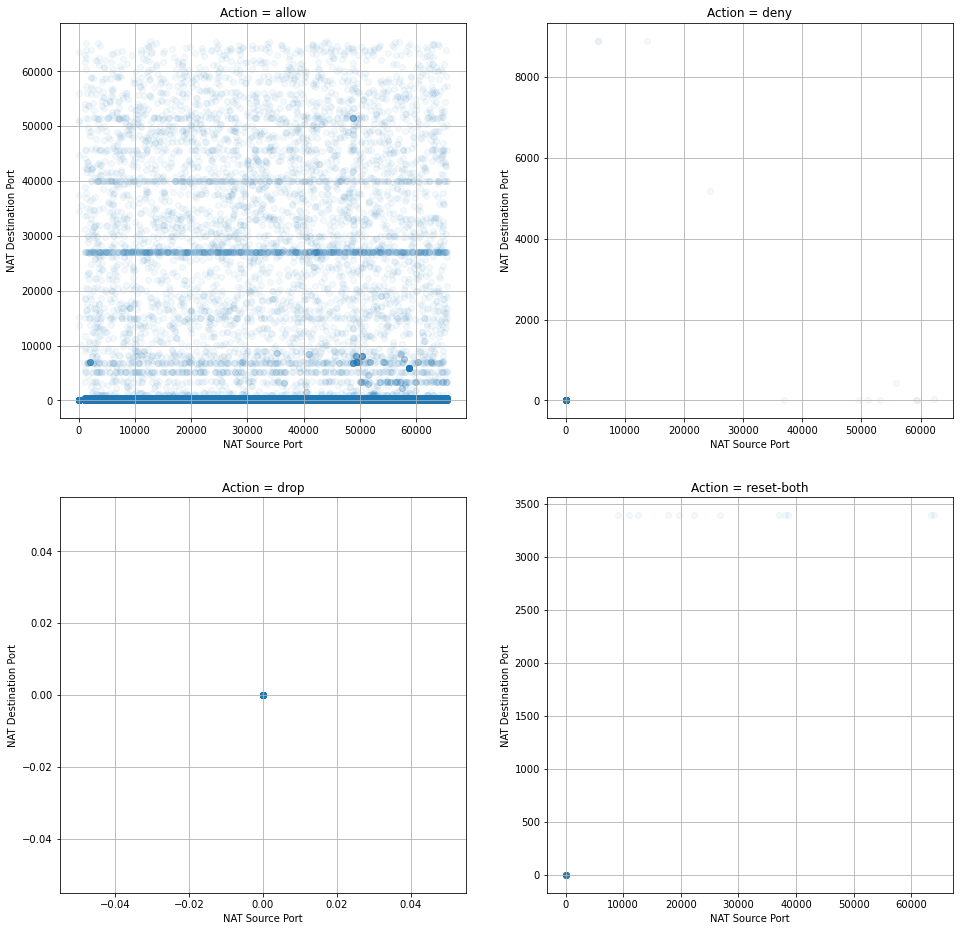

In [16]:
fig, axs = plt.subplots(2, 2,  figsize=(16,16))

allow_data = data[data['Action']=='allow']
axs[0,0].scatter(allow_data['NAT Source Port'], allow_data['NAT Destination Port'], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel('NAT Source Port')
axs[0,0].set_ylabel('NAT Destination Port')
axs[0,0].grid()

deny_data = data[data['Action']=='deny']
axs[0,1].scatter(deny_data['NAT Source Port'], deny_data['NAT Destination Port'], alpha=0.05)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel('NAT Source Port')
axs[0,1].set_ylabel('NAT Destination Port')
axs[0,1].grid()


drop_data = data[data['Action']=='drop']
axs[1,0].scatter(drop_data['NAT Source Port'], drop_data['NAT Destination Port'], alpha=0.05)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel('NAT Source Port')
axs[1,0].set_ylabel('NAT Destination Port')
axs[1,0].grid()

reset_data = data[data['Action']=='reset-both']
axs[1,1].scatter(reset_data['NAT Source Port'], reset_data['NAT Destination Port'], alpha=0.05)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel('NAT Source Port')
axs[1,1].set_ylabel('NAT Destination Port')
axs[1,1].grid()



plt.show()

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [18]:
target_column = ['Action'] 
predictors = list(set(list(data.columns))-set(target_column))
data[predictors] = data[predictors]/data[predictors].max()
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Source Port,65532.0,0.753685,0.232791,0.000000e+00,7.504959e-01,8.205893e-01,8.947722e-01,1.0
Destination Port,65532.0,0.161401,0.281774,0.000000e+00,1.220722e-03,6.790265e-03,2.288853e-01,1.0
NAT Source Port,65532.0,0.294239,0.335251,0.000000e+00,0.000000e+00,1.345922e-01,5.854314e-01,1.0
NAT Destination Port,65532.0,0.040758,0.148610,0.000000e+00,0.000000e+00,8.087282e-04,6.759747e-03,1.0
Bytes,65532.0,0.000077,0.004426,4.726795e-08,5.199475e-08,1.323503e-07,5.926219e-07,1.0
Bytes Sent,65532.0,0.000024,0.004036,6.325929e-08,6.958522e-08,9.488894e-08,2.214075e-07,1.0
Bytes Received,65532.0,0.000233,0.007676,0.000000e+00,0.000000e+00,2.461966e-07,1.399269e-06,1.0
Packets,65532.0,0.000099,0.004954,9.651429e-07,9.651429e-07,1.930286e-06,5.790857e-06,1.0
Elapsed Time (sec),65532.0,0.006082,0.027944,0.000000e+00,0.000000e+00,1.385809e-03,2.771619e-03,1.0
pkts_sent,65532.0,0.000055,0.004306,1.337757e-06,1.337757e-06,1.337757e-06,4.013271e-06,1.0


In [19]:
X = data[predictors].values
y = data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(45872, 11)
(19660, 11)


In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[26389     5     0     0]
 [   65 10327    30     0]
 [    0     0  9022     0]
 [    5    29     0     0]]


/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     26394
        deny       1.00      0.99      0.99     10422
        drop       1.00      1.00      1.00      9022
  reset-both       0.00      0.00      0.00        34

    accuracy                           1.00     45872
   macro avg       0.75      0.75      0.75     45872
weighted avg       1.00      1.00      1.00     45872



/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[11244     2     0     0]
 [   35  4513    17     0]
 [    0     0  3829     0]
 [    7    13     0     0]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11246
        deny       1.00      0.99      0.99      4565
        drop       1.00      1.00      1.00      3829
  reset-both       0.00      0.00      0.00        20

    accuracy                           1.00     19660
   macro avg       0.75      0.75      0.75     19660
weighted avg       1.00      1.00      1.00     19660



/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arunsagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
